In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread('C:\\Users\\sdevelop\\Desktop\\horse.jpg')
img2 = cv2.imread('C:\\Users\\sdevelop\\Desktop\\horse.jpg')


In [3]:
if img1 is None or img2 is None:
    print("Error: One or both image files not found. Please check the file paths.")
    exit()


In [4]:
img1 = cv2.resize(img1, (200, 200))
img2 = cv2.resize(img2, (200, 200))

In [5]:
sift = cv2.SIFT_create()

In [6]:
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [7]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [8]:
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)


In [9]:
good_matches = []
for m, n in matches:
    if m.distance <0.7*n.distance:
        good_matches.append(m)

In [10]:
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

In [11]:
cv2.putText(matched_img, 'image 1', (130, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255),2)
cv2.putText(matched_img, 'Image 2', (130 + img1.shape[1], 30), cv2.FONT_HERSHEY_SIMPLEX,
1, (255, 0, 255), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [228, 181, 120],
        [228, 181, 120],
        [228, 181, 120]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [228, 181, 120],
        [228, 181, 120],
        [228, 181, 120]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [231, 184, 123],
        [231, 184, 123],
        [231, 184, 123]],

       ...,

       [[ 19,  95,  80],
        [  7,  97,  74],
        [ 30, 123,  93],
        ...,
        [ 10, 113,  87],
        [ 32, 136, 110],
        [ 12, 117,  90]],

       [[ 11,  95,  92],
        [ 26, 113, 103],
        [  0,  64,  48],
        ...,
        [  6,  79,  72],
        [ 13,  83,  75],
        [ 19,  93,  86]],

       [[ 30, 115, 110],
        [  2,  89,  76],
        [ 49, 140, 119],
        ...,
        [  4,  83,  73],
        [ 18,  95,  85],
        [  0,  64,  53]]

In [12]:

print(f"Total Good Matches: {len(good_matches)}")

Total Good Matches: 210


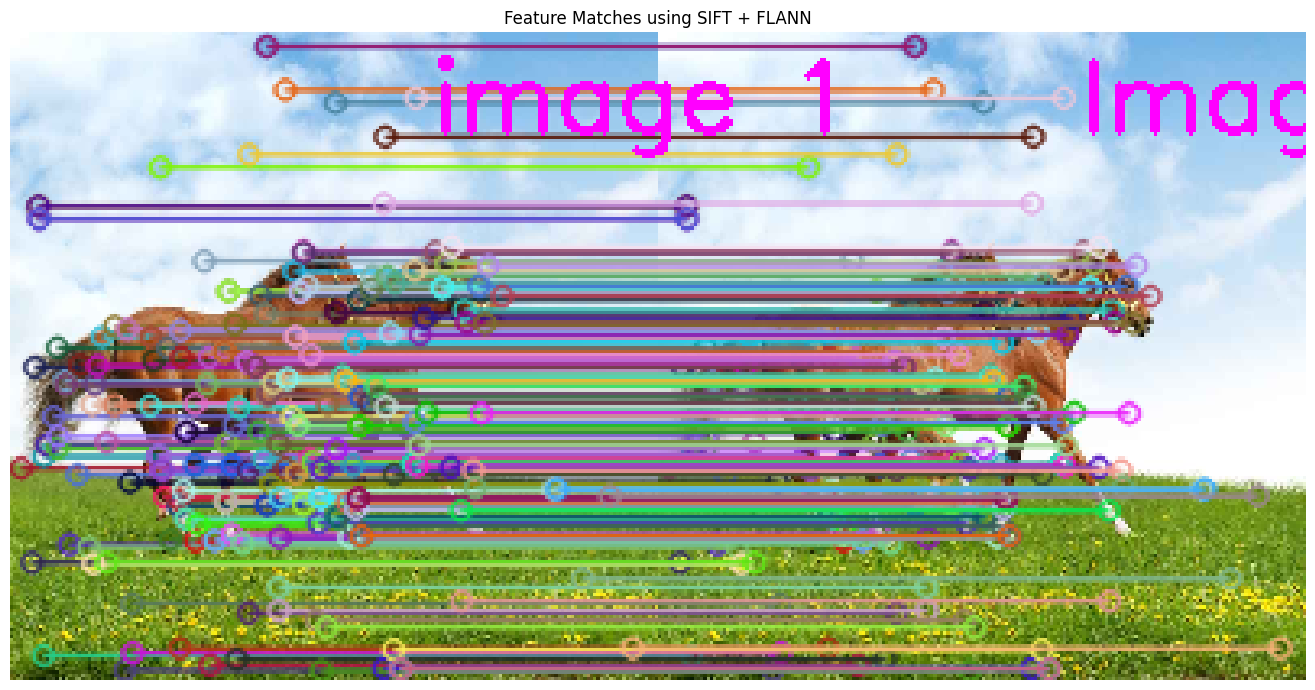

In [13]:
plt.figure(figsize=(14, 7))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('Feature Matches using SIFT + FLANN')
plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
img1 = cv2.imread("C:\\Users\\sdevelop\\Desktop\\horse.jpg", cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("C:\\Users\\sdevelop\\Desktop\\horse.jpg", cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

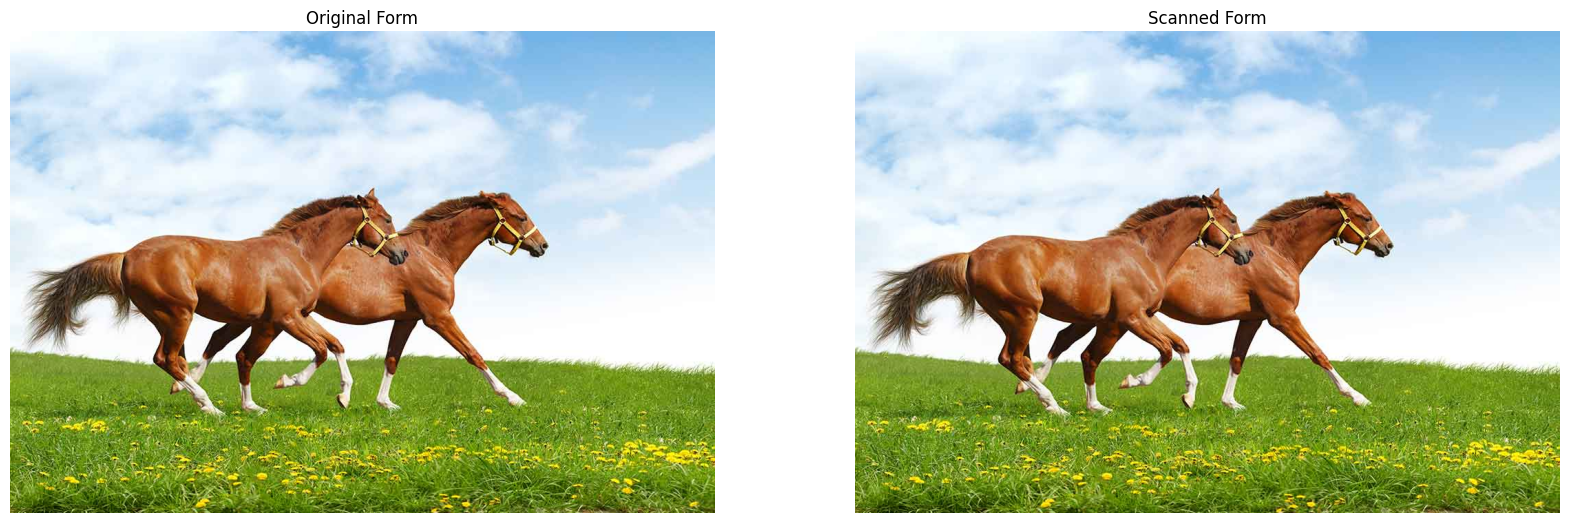

In [15]:
plt.figure(figsize = [20, 10])
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Original Form")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Scanned Form")
plt.axis("off")
plt.show()


In [16]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(img1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2_gray, None)
img1_display = cv2.drawKeypoints(img1, keypoints1,
outImage = np.array([]),
color = (255, 0, 0),
flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_display = cv2.drawKeypoints(img2, keypoints2,
outImage = np.array([]),
color = (255, 0, 0),
flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

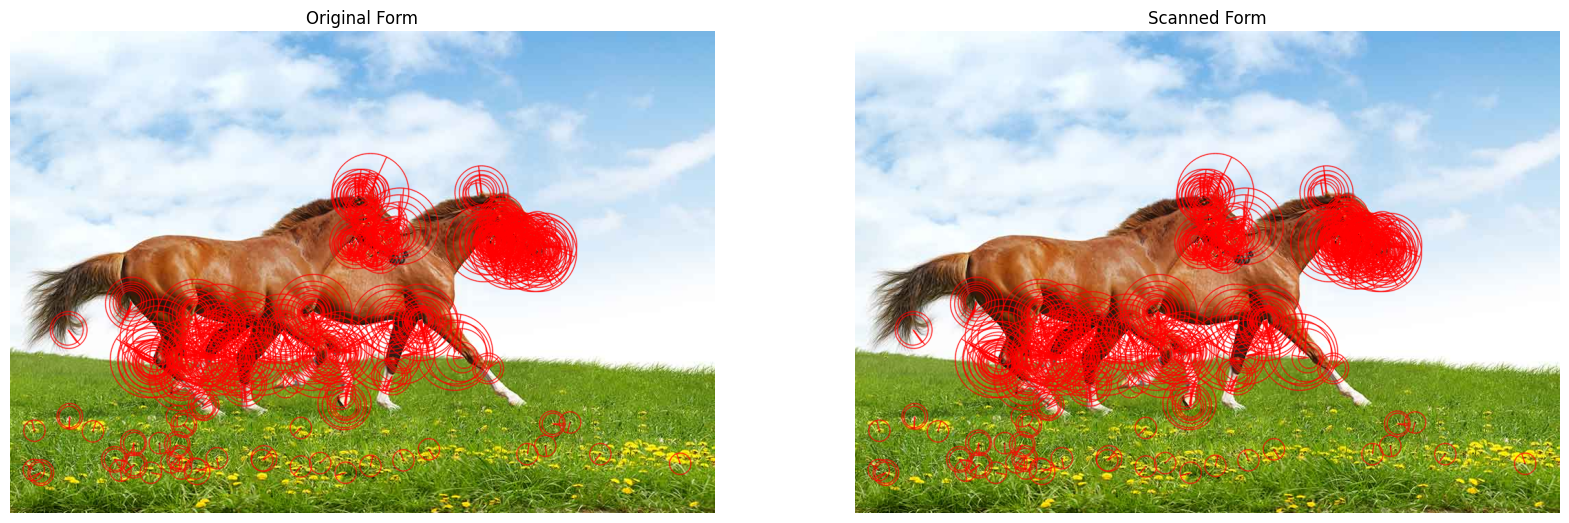

In [17]:
plt.figure(figsize = [20, 10])
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img1_display)
plt.title("Original Form")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(img2_display)
plt.title("Scanned Form")
plt.show()

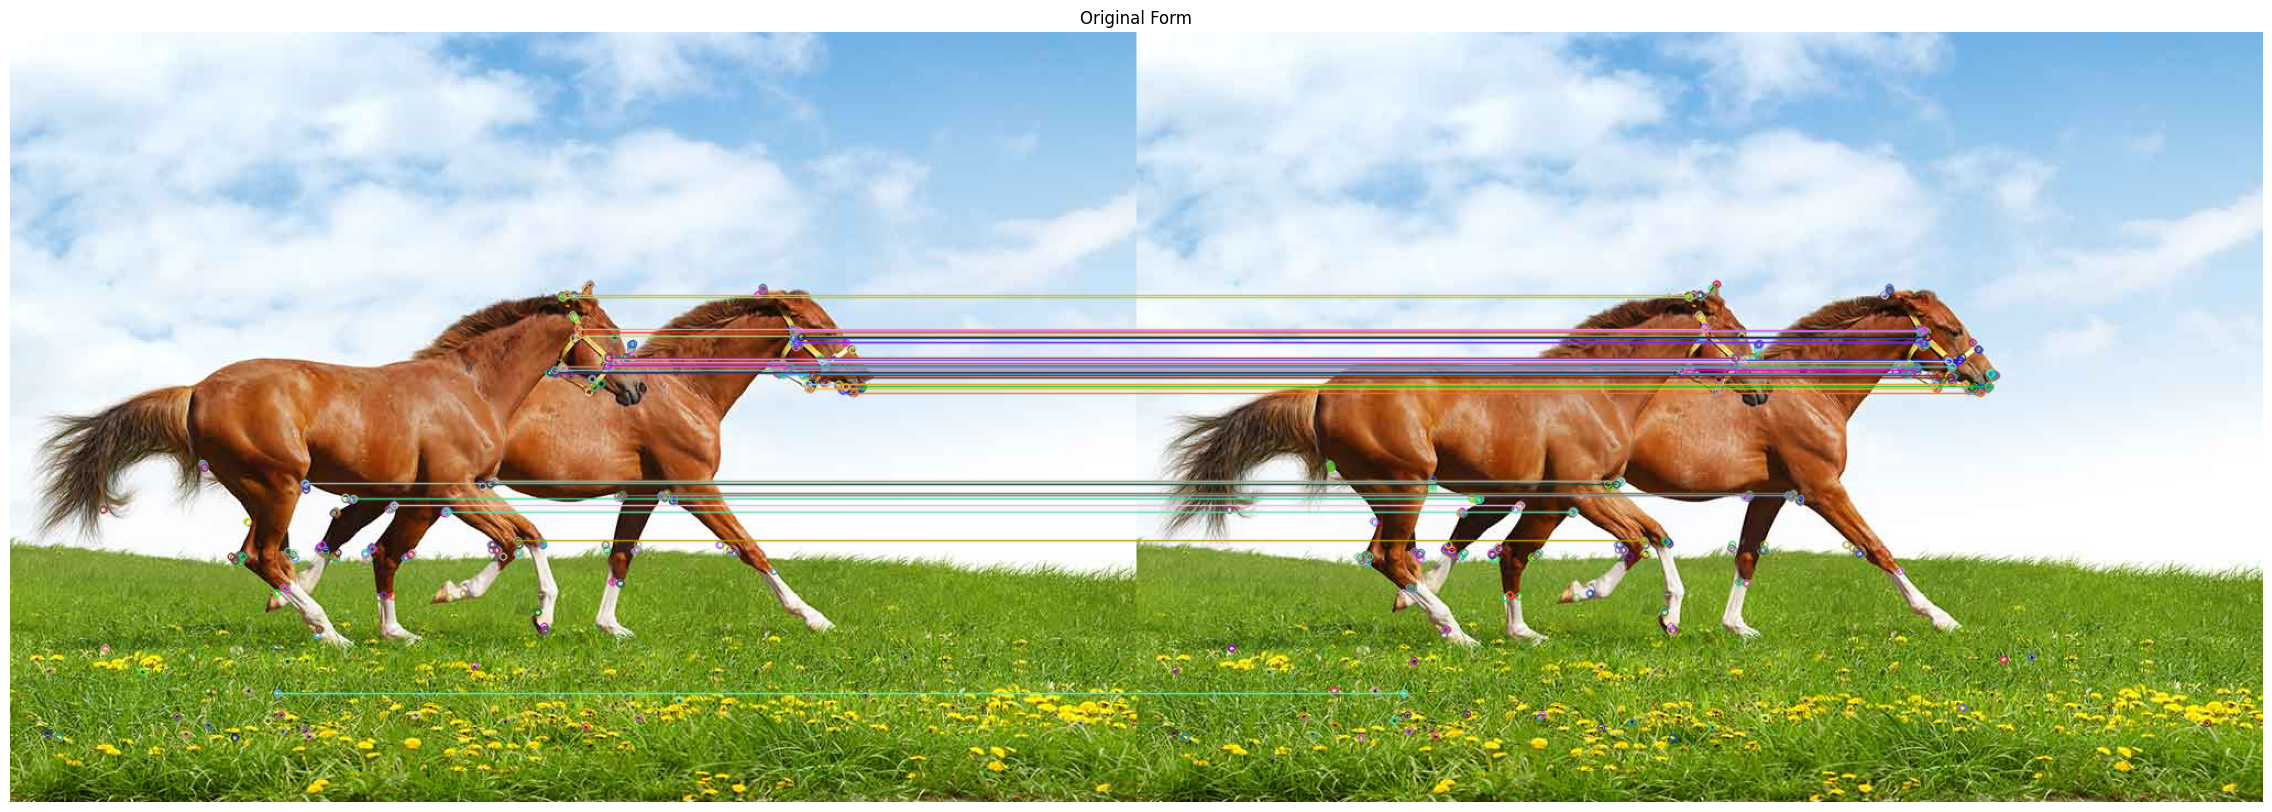

In [18]:
matcher =cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = list(matcher.match(descriptors1, descriptors2, None))
matches.sort(key = lambda x: x.distance, reverse = False)
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]
im_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None)
plt.figure(figsize = [40, 10])
plt.imshow(im_matches)
plt.axis("off")
plt.title("Original Form")
plt.show()

In [19]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
    
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
height, width, channels = img1.shape
aligned_img = cv2.warpPerspective(img2, h, (width, height))

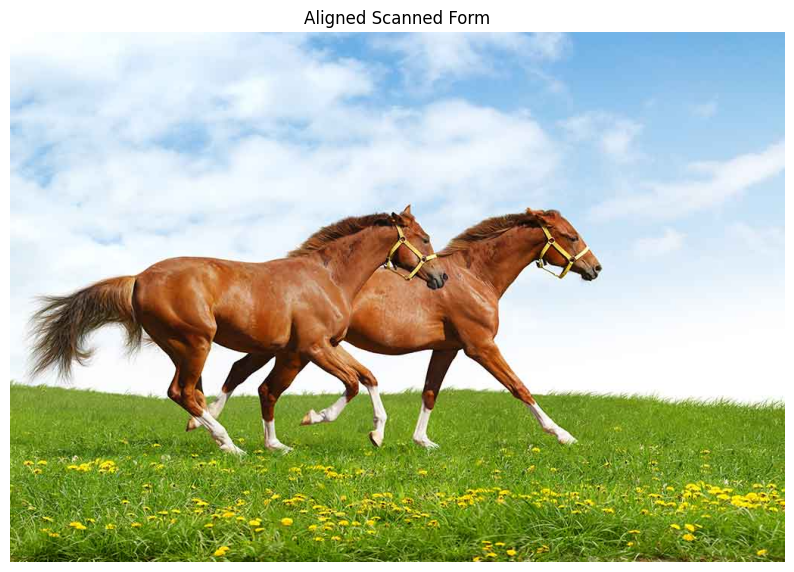

In [20]:
plt.figure(figsize=[10, 10])
plt.imshow(aligned_img)
plt.title("Aligned Scanned Form")
plt.axis("off")
plt.show()